# Assignement06
# Name : Jun-ha Lee
# Student NO. : 2017220159

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

### Plot the noisy data ($x, y_1$)
### Plot the clean data ($x, y_2$)

In [2]:
num = 201
std = 500
a = 2
b = 10

n = np.random.rand(num)
nn = n - np.mean(n)
x = np.linspace(-100, 100, num)
y1 = a * x + nn * std + b # noisy data
y2 = a * x + b # clean data

### Average of $x$, and average of $y_1$
### $\text{Average X} = {{1 \over N} \cdot (\mathbf{1})^T \cdot X}$

In [3]:
mean_x = np.sum(np.ones(num) * x) / num
mean_y1 = np.sum(np.ones(num) * y1) / num

### Define standard deviation of $x$ $std(x_i) = {\lVert x^d - avg(x_i) \cdot \mathbf{1} \rVert \over \sqrt{N}}$

In [4]:
def standard_deviation_x(x):
    return np.sqrt(np.sum((x - mean_x + np.ones(num)) ** 2) / num)

### Define standard deviation of $y_1$ $std(y_i) = {\lVert y^d - avg(y_i) \cdot \mathbf{1} \rVert \over \sqrt{N}} $

In [5]:
def standard_deviation_y1(y1):
    return np.sqrt(np.sum((y1 - mean_y1 + np.ones(num)) ** 2) / num)

### compute the standard deviation

In [6]:
std_x = standard_deviation_x(x)
std_y1 = standard_deviation_y1(y1)

### show result

In [7]:
mean_x, mean_y1, std_x, std_y1

(0.0, 10.000000000000018, 58.031600586806725, 190.36613074544985)

### Define the correlation coefficient between x and y : $\boldsymbol{\rho} = {(x - avg(x_i))^T \cdot (y - avg(y_i))\over N \cdot std(x_i) \cdot std(y_i)}$ 

In [8]:
def correlation(x, y1):
    return np.sum((x - mean_x) * (y1 - mean_y1) / (num * std_x * std_y1))

### Compute the correlation and display

In [9]:
cor = correlation(x, y1)
cor

0.6642089520712002

### Define least-square-fit function : $\hat{f} = avg(y_i) - \boldsymbol{\rho} \cdot {std(y_i) \over std(x_i)} \cdot (x - avg(x_i))$ 

In [10]:
def least_square_fit(x, y1):
    return mean_y1 + (cor * std_y1 / std_x) * (x - mean_x)

### Compute the graph of least_square_fit and show result

In [11]:
app_f = least_square_fit(x, y1)
app_f

array([-207.88626702, -205.70740435, -203.52854168, -201.34967901,
       -199.17081634, -196.99195367, -194.813091  , -192.63422833,
       -190.45536566, -188.27650299, -186.09764032, -183.91877765,
       -181.73991498, -179.56105231, -177.38218964, -175.20332697,
       -173.0244643 , -170.84560163, -168.66673896, -166.48787629,
       -164.30901362, -162.13015095, -159.95128828, -157.77242561,
       -155.59356294, -153.41470027, -151.2358376 , -149.05697493,
       -146.87811226, -144.69924959, -142.52038692, -140.34152425,
       -138.16266158, -135.98379891, -133.80493624, -131.62607356,
       -129.44721089, -127.26834822, -125.08948555, -122.91062288,
       -120.73176021, -118.55289754, -116.37403487, -114.1951722 ,
       -112.01630953, -109.83744686, -107.65858419, -105.47972152,
       -103.30085885, -101.12199618,  -98.94313351,  -96.76427084,
        -94.58540817,  -92.4065455 ,  -90.22768283,  -88.04882016,
        -85.86995749,  -83.69109482,  -81.51223215,  -79.33336

### Plot the line that ﬁts the noisy data by the least square error

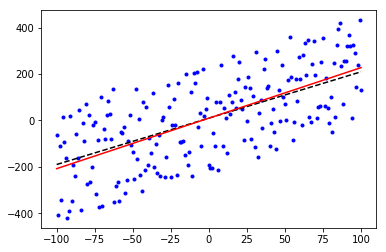

In [12]:
plt.plot(x, y1, 'b.', x, y2, 'k--')
plt.plot(x, app_f, 'r')
plt.show()